# start

Windows  
venv\Scripts\activate

Mac/Linux  
source venv/bin/activate

install  
pip install numpy matplotlib scikit-image scipy opencv-python

# import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import matplotlib
import scipy
import cv2
from matplotlib import cm
from skimage import io, color, feature, transform
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.transform import probabilistic_hough_line, hough_line, hough_line_peaks


# Read image (The BMP file format itself does not specify the order of the colour channels. In these 3 images green is the second channel)
img_school = skimage.io.imread('./Data 06 30213/Bhamimage.jpeg')
img1 = skimage.io.imread('./Data 06 30213/cells/9343 AM.bmp')[:,:,1] #Extract the Green Channel 
img2 = skimage.io.imread('./Data 06 30213/cells/10905 JL.bmp')[:,:,1] #Extract the Green Channel 
img3 = skimage.io.imread('./Data 06 30213/cells/43590 AM.bmp')[:,:,1] #Extract the Green Channel 
img1_ground_truth = skimage.io.imread('C:/Users/jim/git/Computer-Vision-and-Imaging-Lab/finalwork/Data 06 30213/cells/9343 AM Edges.bmp', as_gray=True)
img2_ground_truth = skimage.io.imread('C:/Users/jim/git/Computer-Vision-and-Imaging-Lab/finalwork/Data 06 30213/cells/10905 JL Edges.bmp', as_gray=True)
img3_ground_truth = skimage.io.imread('C:/Users/jim/git/Computer-Vision-and-Imaging-Lab/finalwork/Data 06 30213/cells/43590 AM Edges.bmp', as_gray=True)


# Task1 - def

In [2]:
def magnitude(x, y):
    #return np.sqrt(x**2 + y**2)
    return (abs(x) + abs(y))

# Robinson operators
robinson_x = np.array(
    [[-1, 1, 1],
     [-1, -2, 1],
     [-1, 1, 1]])

robinson_y = np.array(
    [[1, 1, 1],
     [1, -2, 1],
     [-1, -1, -1]])

def robinson_img(img):
    my_robinson_x = abs(scipy.signal.convolve2d(img, robinson_x, mode='same'))
    my_robinson_y = abs(scipy.signal.convolve2d(img, robinson_y, mode='same'))
    return magnitude(my_robinson_x, my_robinson_y)


# Sobel operators
sobel_x = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]])

sobel_y = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]])

def sobel_img(img):
    my_sobel_x = abs(scipy.signal.convolve2d(img, sobel_x, mode='same'))
    my_sobel_y = abs(scipy.signal.convolve2d(img, sobel_y, mode='same'))
    return magnitude(my_sobel_x, my_sobel_y)


# Prewitt operators
prewitt_x = np.array(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]])

prewitt_y = np.array(
    [[1, 1, 1],
     [0, 0, 0],
     [-1, -1, -1]])

def prewitt_img(img):
    my_prewitt_x = abs(scipy.signal.convolve2d(img, prewitt_x, mode='same'))
    my_prewitt_y = abs(scipy.signal.convolve2d(img, prewitt_y, mode='same'))
    return magnitude(my_prewitt_x, my_prewitt_y)


# Kirsch operators
kirsch_x = np.array(
    [[-5, 3, 3],
     [-5, 0, 3],
     [-5, 3, 3]])

kirsch_y = np.array(
    [[3, 3, 3],
     [3, 0, 3],
     [-5, -5, -5]])

def kirsch_img(img):
    my_kirsch_x = abs(scipy.signal.convolve2d(img, kirsch_x, mode='same'))
    my_kirsch_y = abs(scipy.signal.convolve2d(img, kirsch_y, mode='same'))
    return magnitude(my_kirsch_x, my_kirsch_y)


# Gaussian operators (5x5)
gaussian = np.array(
    [[1, 4, 7, 4, 1],
     [4, 16, 26, 16, 4],
     [7, 26, 41, 26, 7],
     [4, 16, 26, 16, 4],
     [1, 4, 7, 4, 1]])

def gaussian_img(img):
    my_gaussian = abs(scipy.signal.convolve2d(img, gaussian, mode='same'))
    return my_gaussian


# Invert image colors
def invert_image(img):
    return 1 - img

# Apply gaussian filter -> edge detection -> threshold
def apply_edge_detection_and_after_reprocess(img, edge_detection_func, threshold=0):

    if edge_detection_func is robinson_img: threshold = 7  # threshold for robinson
    elif edge_detection_func is sobel_img: threshold = 10  # threshold for sobel
    elif edge_detection_func is prewitt_img: threshold = 7 # threshold for prewitt
    elif edge_detection_func is kirsch_img: threshold = 26 # threshold for kirsch
    else: threshold = 0 # for error

    if img is img1: gaussian_blur_times = 2; threshold = threshold * 650000 # gaussian 2 time so will be very high
    elif img is img2: gaussian_blur_times = 0; threshold = threshold * 9
    elif img is img3: gaussian_blur_times = 1; threshold = threshold * 1200 # gaussian 1 time so will be high
    else: gaussian_blur_times = 0; threshold = 0 # for error

    for _ in range(gaussian_blur_times):     # Apply gaussian filter
        img = gaussian_img(img)

    edge_img = edge_detection_func(img)     # Apply edge detection
    
    # Normalize the edge detection result
    #edge_img = cv2.normalize(edge_img, None, 0, 255, cv2.NORM_MINMAX)
    
    # Apply threshold
    edge_img = edge_img > threshold

    return edge_img




# Tast1 - Apply

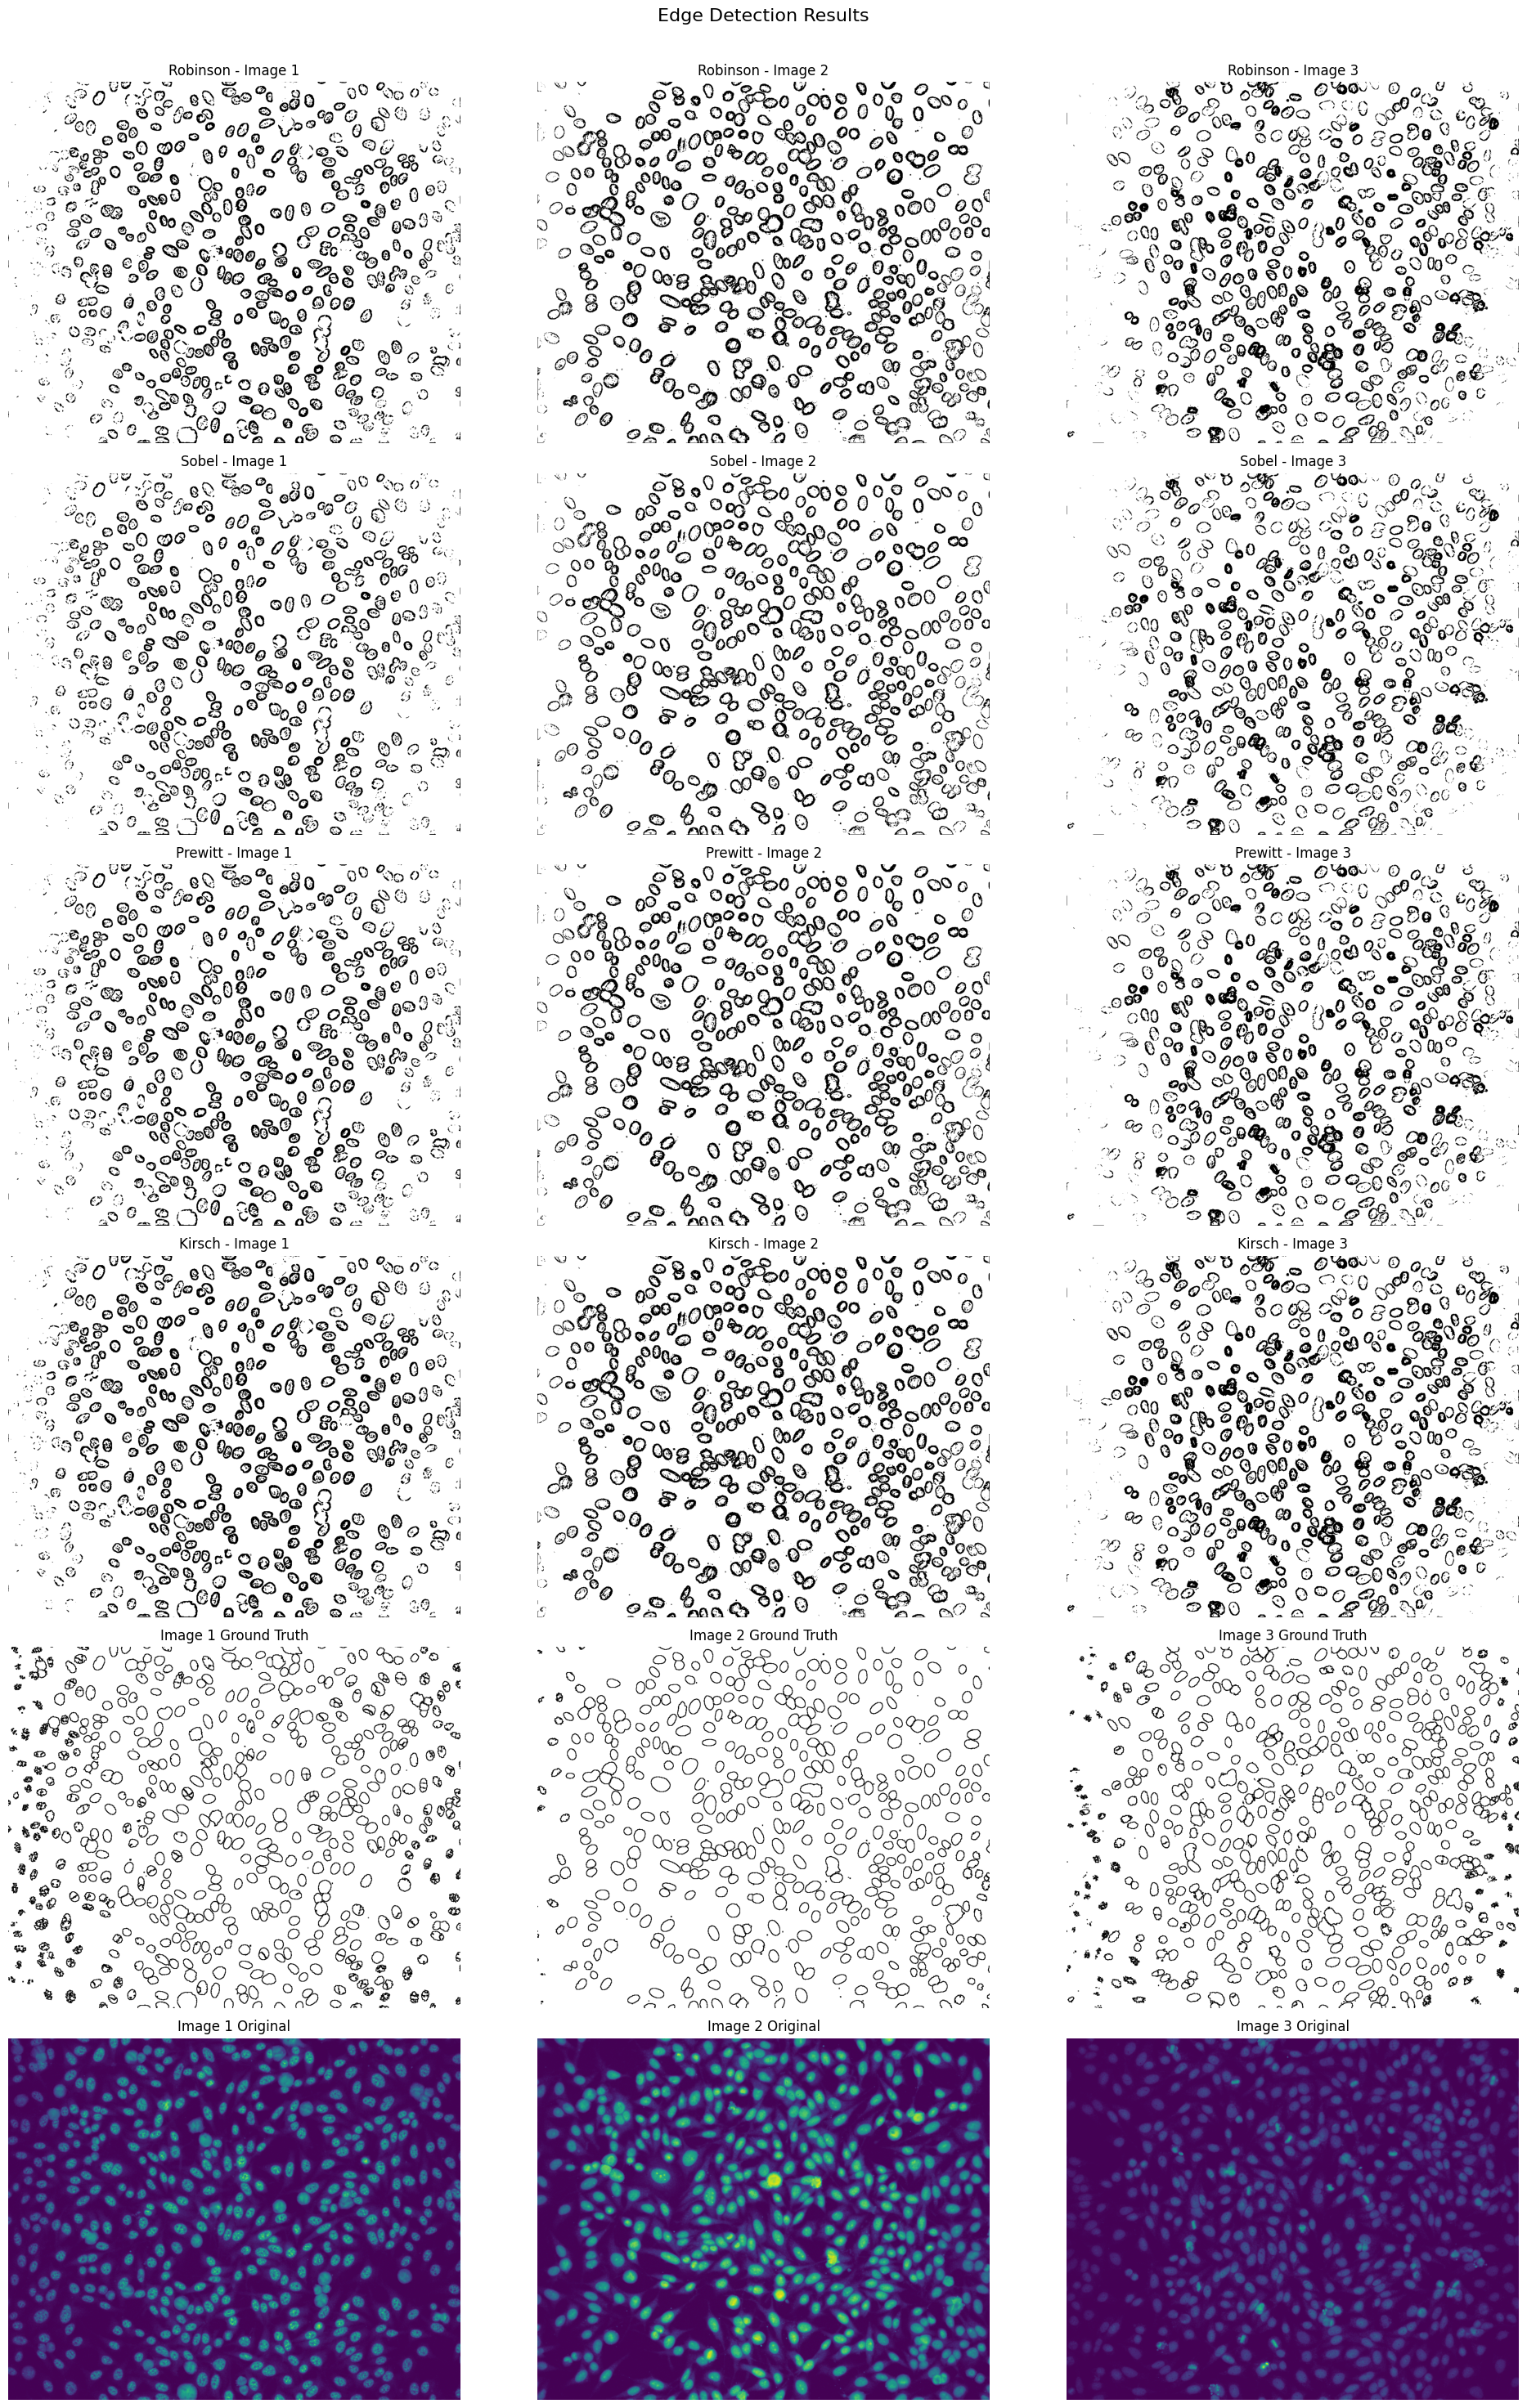

In [3]:
# Apply Robinson edge detection
img1_robinson = apply_edge_detection_and_after_reprocess(img1, robinson_img)
img2_robinson = apply_edge_detection_and_after_reprocess(img2, robinson_img)
img3_robinson = apply_edge_detection_and_after_reprocess(img3, robinson_img)

# Apply Sobel edge detection
img1_sobel = apply_edge_detection_and_after_reprocess(img1, sobel_img)
img2_sobel = apply_edge_detection_and_after_reprocess(img2, sobel_img)
img3_sobel = apply_edge_detection_and_after_reprocess(img3, sobel_img)

# Apply Prewitt edge detection
img1_prewitt = apply_edge_detection_and_after_reprocess(img1, prewitt_img)
img2_prewitt = apply_edge_detection_and_after_reprocess(img2, prewitt_img)
img3_prewitt = apply_edge_detection_and_after_reprocess(img3, prewitt_img)

# Apply Kirsch edge detection
img1_kirsch = apply_edge_detection_and_after_reprocess(img1, kirsch_img)
img2_kirsch = apply_edge_detection_and_after_reprocess(img2, kirsch_img)
img3_kirsch = apply_edge_detection_and_after_reprocess(img3, kirsch_img)

# Create a figure with multiple subplots
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

# Set title
fig.suptitle('Edge Detection Results', fontsize=16)

# Invert image colors
def invert_image(img):
    return 1 - img

# Display edge detection results
edge_detection_methods = ['Robinson', 'Sobel', 'Prewitt', 'Kirsch']
edge_images = [
    [img1_robinson, img2_robinson, img3_robinson],
    [img1_sobel, img2_sobel, img3_sobel],
    [img1_prewitt, img2_prewitt, img3_prewitt],
    [img1_kirsch, img2_kirsch, img3_kirsch]
]

for i, method in enumerate(edge_detection_methods):
    for j in range(3):
        axes[i, j].imshow(invert_image(edge_images[i][j]), cmap='gray')
        axes[i, j].set_title(f'{method} - Image {j+1}')
        axes[i, j].axis('off')

# Display ground truth and original images
ground_truth_images = [img1_ground_truth, img2_ground_truth, img3_ground_truth]
original_images = [img1, img2, img3]

for j in range(3):
    axes[4, j].imshow(ground_truth_images[j], cmap='gray')
    axes[4, j].set_title(f'Image {j+1} Ground Truth')
    axes[4, j].axis('off')

    axes[5, j].imshow(original_images[j])
    axes[5, j].set_title(f'Image {j+1} Original')
    axes[5, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Save the figure with a specific resolution
plt.savefig('new_edge_detection_results.png', dpi=1200)

# Show the figure
plt.show()

# Task2

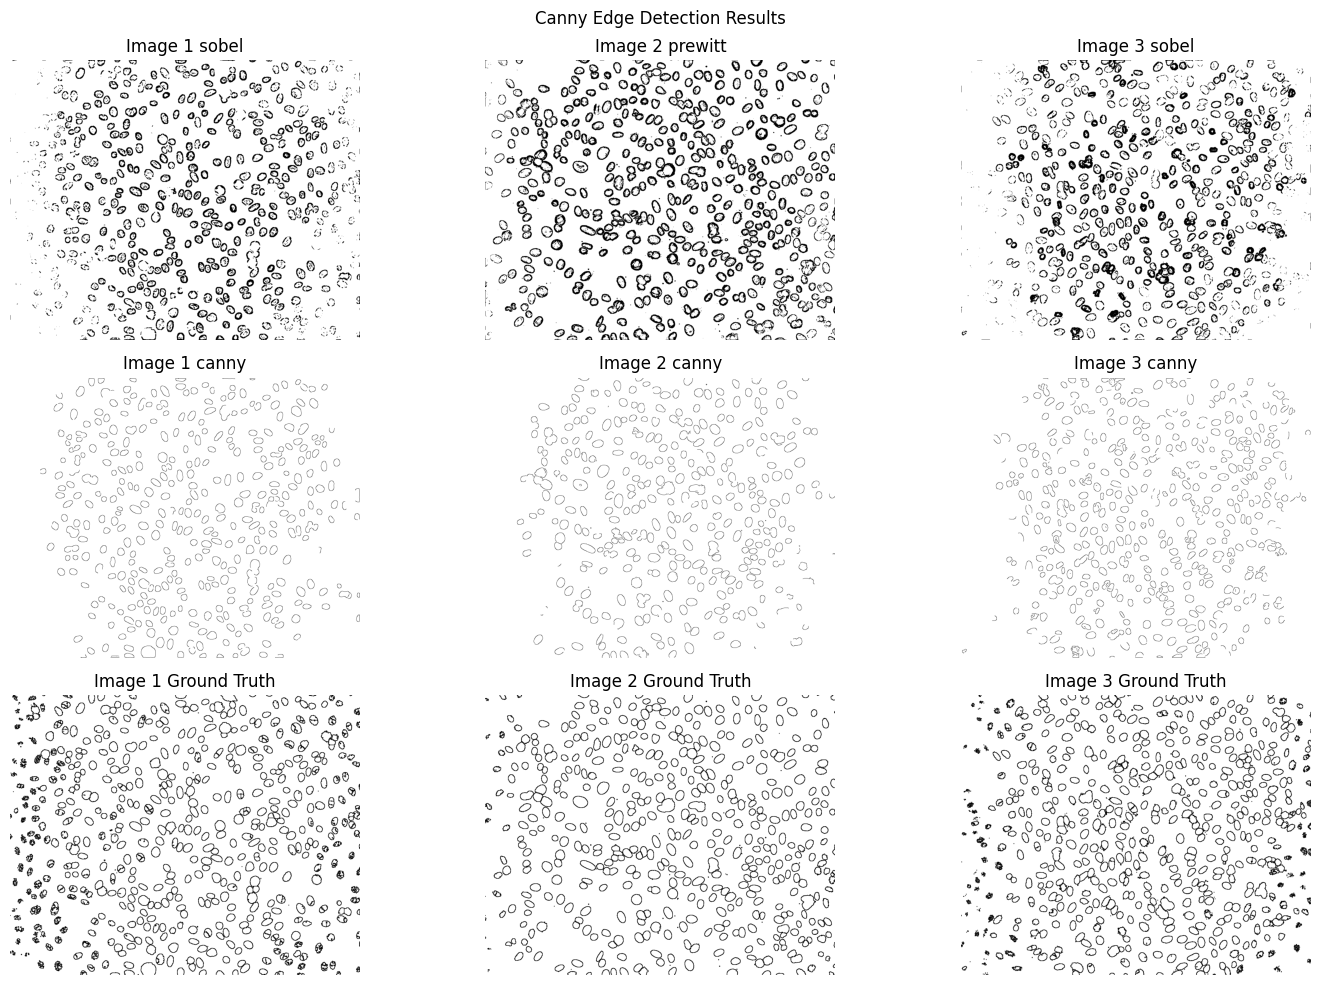

Image 1 similarity sobel:   91.14%
Image 1 similarity canny:   90.85%

Image 2 similarity prewitt: 90.00%
Image 2 similarity canny:   94.08%

Image 3 similarity sobel:   90.43%
Image 3 similarity canny:   91.41%


In [4]:
# mean (5x5)
mean5 = np.ones((5, 5)) / 25

# mean (7x7)
mean7 = np.ones((7, 7)) / 49

# Apply Gaussian blur twice to img1
img1_blurred = abs(scipy.signal.convolve2d( abs(scipy.signal.convolve2d(img1, mean7, mode='same'))  , mean5, mode='same'))  # convolve two times
img3_blurred = abs(scipy.signal.convolve2d(img3, mean5, mode='same'))    

# Convert the blurred image to 8-bit unsigned integer type
img1_normalize = cv2.normalize(img1_blurred, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
img3_normalize = cv2.normalize(img3_blurred, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Canny edge detection. use cv2.Canny is because i can change apertureSize from 3 in skimage canny to 5 or 7 
#img1_canny = cv2.Canny(img1_normalize, 20000, 51000, apertureSize=7, L2gradient=False)
img1_canny = cv2.Canny(img1_normalize, 20000, 27900, apertureSize=7, L2gradient=True)
#img2_canny = cv2.Canny(img2, 23000, 35000, apertureSize=7, L2gradient=False)
img2_canny = cv2.Canny(img2, 1500, 2400, apertureSize=5, L2gradient=True)
img3_canny = cv2.Canny(img3_normalize, 10000, 12000, apertureSize=7, L2gradient=True)


# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Set title
fig.suptitle('Canny Edge Detection Results')

axes[0,0].imshow(invert_image(img1_sobel), cmap='gray')
axes[0,0].set_title('Image 1 sobel')
axes[0,0].axis('off')

axes[0,1].imshow(invert_image(img2_prewitt), cmap='gray')
axes[0,1].set_title('Image 2 prewitt')
axes[0,1].axis('off')

axes[0,2].imshow(invert_image(img3_sobel), cmap='gray')
axes[0,2].set_title('Image 3 sobel')
axes[0,2].axis('off')

# Display Sobel edge detection results
axes[1,0].imshow(cv2.bitwise_not(img1_canny), cmap='gray')
axes[1,0].set_title('Image 1 canny')
axes[1,0].axis('off')

axes[1,1].imshow(cv2.bitwise_not(img2_canny), cmap='gray')
axes[1,1].set_title('Image 2 canny')
axes[1,1].axis('off')

axes[1,2].imshow(cv2.bitwise_not(img3_canny), cmap='gray')
axes[1,2].set_title('Image 3 canny')
axes[1,2].axis('off')


# Display ground truth images
axes[2, 0].imshow(img1_ground_truth, cmap='gray')
axes[2, 0].set_title('Image 1 Ground Truth')
axes[2, 0].axis('off')

axes[2, 1].imshow(img2_ground_truth, cmap='gray')
axes[2, 1].set_title('Image 2 Ground Truth')
axes[2, 1].axis('off')

axes[2, 2].imshow(img3_ground_truth, cmap='gray')
axes[2, 2].set_title('Image 3 Ground Truth')
axes[2, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure with a specific resolution
plt.savefig('new_canny_edge_detection3.png', dpi=300)

# Show the figure
plt.show()


def calculate_similarity(detected_edges, ground_truth):
    # Convert images to boolean type
    detected_edges_bool = detected_edges.astype(bool)
    ground_truth_bool = ground_truth.astype(bool)
    # Calculate the number of identical pixels
    same_pixels = np.sum(detected_edges_bool == ground_truth_bool)
    # Calculate the total number of pixels
    total_pixels = detected_edges_bool.size
    # Calculate the similarity percentage
    similarity_percentage = (same_pixels / total_pixels) * 100
    return similarity_percentage

# calculate similarity
similarity_img1_canny = calculate_similarity(cv2.bitwise_not(img1_canny), img1_ground_truth)
similarity_img2_canny = calculate_similarity(cv2.bitwise_not(img2_canny), img2_ground_truth)
similarity_img3_canny = calculate_similarity(cv2.bitwise_not(img3_canny), img3_ground_truth)

similarity_img1 = calculate_similarity(invert_image(img1_sobel), img1_ground_truth)
similarity_img2 = calculate_similarity(invert_image(img2_prewitt), img2_ground_truth)
similarity_img3 = calculate_similarity(invert_image(img3_sobel), img3_ground_truth)

print(f"Image 1 similarity sobel:   {similarity_img1:.2f}%")
print(f"Image 1 similarity canny:   {similarity_img1_canny:.2f}%")
print(f"")
print(f"Image 2 similarity prewitt: {similarity_img2:.2f}%")
print(f"Image 2 similarity canny:   {similarity_img2_canny:.2f}%")
print(f"")
print(f"Image 3 similarity sobel:   {similarity_img3:.2f}%")
print(f"Image 3 similarity canny:   {similarity_img3_canny:.2f}%")

# Task3

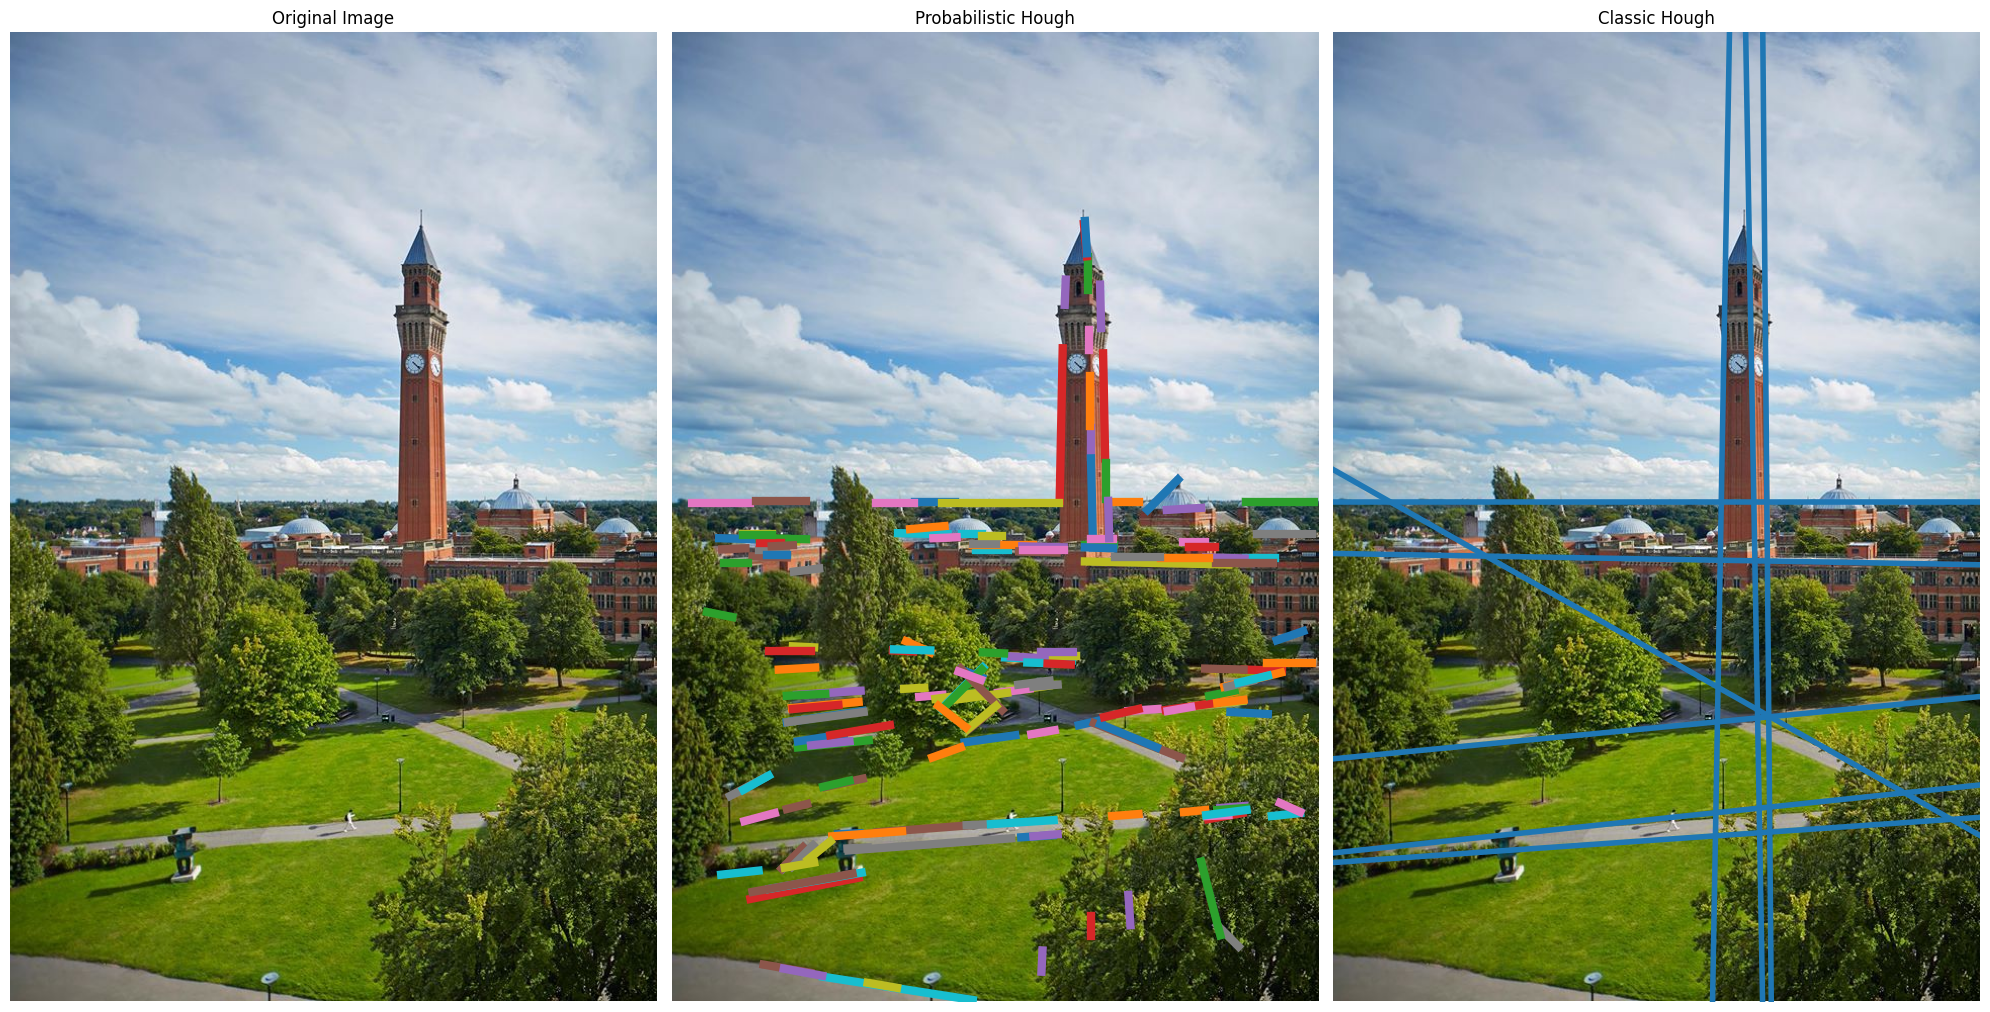

In [5]:

# The image is RGB and we need to convert to grayscale
img_grey = rgb2gray(img_school)

# Line finding using the Probabilistic Hough Transform
img_edges1 = canny(img_grey, sigma=2.0, low_threshold=0.15, high_threshold=0.4, mask=None, use_quantiles=False)
lines_Probabilisti = probabilistic_hough_line(img_edges1, threshold=70, line_length=20, line_gap=10)

# Apply Canny for classic Hough transform
img_edges2 = canny(img_grey, sigma=1.0, low_threshold=0.2, high_threshold=0.8, mask=None, use_quantiles=False)

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False) 
h, theta, d = hough_line(img_edges2, theta=tested_angles)
accum, angles, dists = hough_line_peaks(h,theta,d,threshold=150,num_peaks=9)
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean() # Define the bounds of the image in the Hough space
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Configure the figure
fig, axes = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()

# Display the original image
ax[0].imshow(img_school, cmap=cm.gray)
ax[0].set_title('Original Image')
ax[0].set_axis_off()

# Display the Probabilistic Hough Transform result
ax[1].imshow(img_school, cmap=cm.gray)# ax[1].imshow(edges_Probabilisti * 0)
for i in lines_Probabilisti: # for i in lines_Probabilisti draw a line from p0 to p1
    p0, p1 = i
    ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]), linewidth=6)
ax[1].set_xlim((0, img_school.shape[1]))
ax[1].set_ylim((img_school.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Probabilistic Hough')


# Display the Classic Hough Transform result
ax[2].imshow(img_school, cmap=cm.gray)
for i in range(0, len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0), slope=np.tan(angles[i] + np.pi/2), linewidth=4)
ax[2].set_ylim((img_school.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Classic Hough')

# Save the figure with a specific resolution
plt.savefig('new_Hough_3.png', dpi=300)

plt.tight_layout()
plt.show()